In [ ]:
from IPython.display import display, Math, Latex

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# C1: Training Data

In [ ]:
# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameteres:
w1=3
w0=4
n=100

X = 10 * np.random.randn(n,)

# Obtain y = 4 + 3*x + noise. Noise is randomly applied.
y = w0 + w1 + X + np.random.randn(n,)

Let's examine the shapes of training data for sanity check.

In [ ]:
print(f'shape of the training data feature matrix: {X.shape}')
print(f'shape of the label vector: {y.shape}')


shape of the training data feature matrix: (100,)
shape of the label vector: (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's do a quick sanity check to make sure the sizes of the feature and label sets are identical in both training and test sets:

In [ ]:
print(f'Shape of training feature matrix: {X_train.shape}')
print(f'Shape of training flabel vector: {y_train.shape}')

print(f'Shape of test feature matrix: {X_test.shape}')
print(f'Shape of test flabel vector: {y_test.shape}')

Shape of training feature matrix: (80,)
Shape of training flabel vector: (80,)
Shape of test feature matrix: (20,)
Shape of test flabel vector: (20,)


Let's quickly check the first few examples and labels

In [ ]:
X_train[:5]

array([-1.13133397, 18.28026831,  3.92891332, -1.88771235,  8.89447183])

In [ ]:
y_train[:5]

array([ 6.05674027, 23.82155088, 12.13792141,  4.71915352, 16.25994985])

Let's visualize the training set.

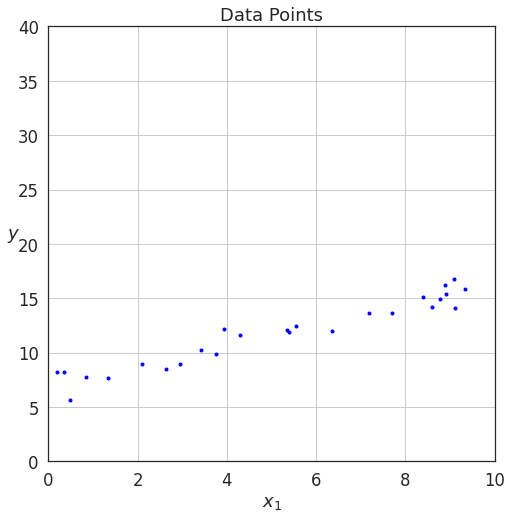

In [ ]:
sns.set_style('white')
f = plt.figure(figsize=(8, 8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

plt.plot(X_train, y_train, 'b.')
plt.title('Data Points')
plt.grid(True)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 10, 0, 40])

plt.show()

We have a training set consisting of a single feature so we will fit a simple linear regression model with one feature. It's form is: 
y = w0 + w1x1

As discussed in the lectures, we add a special dummy feature x0 and set it to 1. We create a helper function for that.

In [ ]:
def add_dummy_feature(x):
  '''Adds a dummy feature to the dataset.

  Args:
    X: Training dataset

  Returns:
    Training dataset with an addition of dummy feature.
    '''
  # np.ones(x.shape[0]) create a vector of 1's having the same number of 
  # rows as number of sample dataset.
  return np.column_stack((np.ones(x.shape[0]), x))

Let's write a test case to test this function:

For that let's take two examples and three fetures. The first example is a feature vector:

In [ ]:
import unittest

class TestAddDummyFeature(unittest.TestCase):

  def test_add_dummy_feature(self):
    '''Test case function for add_dummy_feature'''
    train_matrix = np.array([[3, 2, 5], [9, 4, 7]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

    # test the shape
    self.assertEqual(train_matrix_with_dummy_feature.shape, (2, 4))

    # and contents
    np.testing.assert_array_equal(train_matrix_with_dummy_feature, np.array([[1, 3, 2, 5], [1, 9, 4, 7]]))

unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [ ]:
add_dummy_feature(np.array([[3, 2], [5, 4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

Let's preprocess the training set to add the dummy feature

In [ ]:
print('Before adding the dummy feature:\n', X_train[:5])
print('\n')

X_train_with_dummy = add_dummy_feature(X_train)

print('After adding the dummy feature:\n', X_train_with_dummy[:5, :])

Before adding the dummy feature:
 [-1.13133397 18.28026831  3.92891332 -1.88771235  8.89447183]


After adding the dummy feature:
 [[ 1.         -1.13133397]
 [ 1.         18.28026831]
 [ 1.          3.92891332]
 [ 1.         -1.88771235]
 [ 1.          8.89447183]]


# C2: Model

The objective of this colab is to implement model and inference component from linear regression model.

In [ ]:
# Library import

In [ ]:
def predict(X, w):
  '''Prediction of output label for a given input.

  Args:
    X: Feature matrix of shape (n, m+1).
    w: weight vector of shape (m+1, n)

  Returns:
    y: Predicted label vector of shape (n,).'''

  # Check to make sure that feature matrix and weight vector have compatible shapes.

  assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
  return X @ w
  

Let's test this function now.

In [ ]:
import unittest

class TestPredict(unittest.TestCase):

  def test_predict(self):
    '''Test case predict function of linear regression'''
    # set up
    train_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])
    expected_label_vector = np.array([11 ,21])    # calculated manually with w1=3, w0=4

    # call
    predicted_label_vector = predict(train_matrix, weight_vector)

    # asserts
    # test the shape
    self.assertEqual(predicted_label_vector.shape, (2, ))

    # and contents
    np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict', verbosity=2, exit=False)

test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Demonstration on synthetic dataset

Synthetic dataset already created above in C1.

Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for the given dataset:

In [ ]:
w = np.random.rand(2, )
w

array([0.05242056, 0.46960122])

In [ ]:
y_hat = predict(X_train_with_dummy, w)

# C3: Loss function implementation

The objective of this colab is to implement the loss function of linear regression model from scratch.

X is feature matrix containing m+1 features, w is weight vector containing m+1 weights (one for each feature) and y is label matrix containing labels for n examples in a vector of shape (n, ).

In [ ]:
def loss(X, y, w):
  '''Calculate loss for a model based on known labels.

  Args:
    X: Feature matrix for given inputs.
    y: Output label vector as predicted by the given model.
    w: Weight vector

  Returns:
    Loss
    '''
  e = predict(X, w) - y
  return (1/2) * (np.transpose(e) @ e)

Test the above function by creating our own X, w, and y.

In [ ]:
import unittest

class TestLossFunction(unittest.TestCase):
  
  def test_loss_function(self):
    '''Test case for loss function of linear regression'''
    # set up
    feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])
    label_vector = np.array([6, 11])
    expected_loss = np.array([62.5])

    # call 
    loss_value = loss(feature_matrix, label_vector, weight_vector)

    # asserts
    # test the shape
    self.assertEqual(loss_value.shape, ())

    # and contents
    np.testing.assert_array_equal(expected_loss, loss_value)

unittest.main(argv=[''], defaultTest='TestLossFunction', verbosity=2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Since we have not yet trained our model, let's use a random weight vector to calculate loss for linear regression model with single feature on synthetic dataset.

In [ ]:
w = np.random.rand(2, )

## Visualize loss from random weights compared to weights used to generate the synthetic data.

## AQ 2.9

This assignment will not be graded and is only for practice.
Consider following code for following 2 questions.

What is the value of 'a' from the above code?

In [ ]:
X = np.array([[1,2,2,1],[1,1,3,2]])
y = np.array([3,5])
w = np.array([1,2,3,4])
a = loss(X,y,w)
a

184.5

What is the value of 'a' if 'w' is doubled?

In [ ]:
w = 2*w

In [ ]:
a = loss(X,y,w)
a

977.0

# C4: Optimization

The objective of this colab is to implement optimization component of linear regression model.

It is implemented with one of the following two methods:
> Normal equation method  
  > Sets the partial derivative of the loss function w.r.t weight vector to 0 and solves the resulting equation to obtain the weight vector.  
> Gradient descent method  
  > Iteratively adjusts the weight vector based on the learning rate and the gradient of loss function at the current weight vector.  

## Normal equation

The weight vector is estimated by matrix multiplication of pseudo-inverse of feature matrix and the label vector.

The vectorized implementation is fairly straight forward.
> We make use of np.linalg.pinv for calculating pseudoinverse of the feature matrix.

In [ ]:
def normal_equation(X, y):
  '''Estimates parameters of the linear regression model with normal equation.

  Args:
    X: Feature matrix for given inputs.
    y: Actual label vector.

  Returns:
    Weight vector
  '''

  return np.linalg.pinv(X) @ y

Test the function above.

In [ ]:
import unittest

class TestNormalEquation(unittest.TestCase):

  def test_normal_equation(self):
    '''
    Test case for weight estimation for linear regression with normal equation method.
    '''
    # set up
    feature_matrix = X_train_with_dummy
    label_vector = y_train
    expected_weight_vector = np.array([4., 3.])

    # call
    estimated_weight_vector = normal_equation(feature_matrix, label_vector)

    # asserts
    # test the shape
    self.assertEqual(estimated_weight_vector.shape, (2, ))

    # and contents
    np.testing.assert_array_almost_equal(estimated_weight_vector, expected_weight_vector, decimal=0)

unittest.main(argv=[''], defaultTest='TestNormalEquation', verbosity=2, exit=False)


test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal equation method. ... FAIL

FAIL: test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal equation method.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-42-3f0399286191>", line 22, in test_normal_equation
    np.testing.assert_array_almost_equal(estimated_weight_vector, expected_weight_vector, decimal=0)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 1048, in assert_array_almost_equal
    precision=decimal)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 844, in assert_array_compare
    raise AssertionError(msg)
AssertionError: 
Arrays are not almost equal to 0 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 2.95352016
Max relative di

## Gradient descent


GD is implemented as follows:  
> Randomly initialize w to 0
> Iterate until convergence:  
  > Calculate the partial derivative of loss w.r.t weight vector
  > Calculate new values of weights
  > Update weights to new values simultaneously

We use number of epochs as a convergence criteria in this implementation.

In [ ]:
def calculate_gradient(X, y, w):
  '''Calculates gradient of loss function w.r.t weight vector on training set.

  Arguments:
    X: Feature matrix of training data.
    y: Label vector for training data.
    w: Weight vector

  Returns:
    A vector of gradients.
  '''

  return np.transpose(X) @ (predict(X, w) - y)

In [ ]:
class TestCalculateGradient(unittest.TestCase):

  def test_calculate_gradient(self):
    '''Test case for gradient calculation.
    '''

    # set up
    feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])
    label_vector = np.array([6, 11])
    expected_grad = np.array([15, 105, 50, 95])

    # call
    grad = calculate_gradient(feature_matrix, label_vector, weight_vector)

    # asserts
    # test the shape
    self.assertEqual(grad.shape, (4, ))

    # and contents
    np.testing.assert_array_almost_equal(expected_grad, grad, decimal=0)

unittest.main(argv=[''], defaultTest='TestCalculateGradient', verbosity=2, exit=False)

test_calculate_gradient (__main__.TestCalculateGradient)
Test case for gradient calculation. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## Weight updates

We obtain the new weight from the old one by subtracting gradient weighted by the learning rate.

In [ ]:
def update_weights(w, grad, lr):
  '''Updates the weights based on the gradient of loss function.

  Weight updates are carried out with the following formula:
    w_new := w_old - lr * grad

  Args:
    w: weight vector
    grad: gradient of loss w.r.t w
    lr: learning rate

  Returns:
    Updated weight vector
  '''
  return (w - lr*grad)


Test the function above.

In [ ]:
class TestUpdateWeights(unittest.TestCase):

  def test_update_weights(self):
    '''
    Test case for weight update in GD.
    '''

    # set up
    weight_vector = np.array([1, 1, 1, 1])
    grad_vector = np.array([15, 105, 50, 95])
    lr = 0.001
    expected_w_new = np.array([0.985, 0.895, 0.95, 0.905])

    # call
    w_new = update_weights(weight_vector, grad_vector, lr)

    # asserts
    # test the shape
    self.assertEqual(expected_w_new.shape, (4, ))

    # and contents
    np.testing.assert_array_almost_equal(expected_w_new, w_new, decimal=1)

unittest.main(argv=[''], defaultTest='TestUpdateWeights', verbosity=2, exit=False)

test_update_weights (__main__.TestUpdateWeights)
Test case for weight update in GD. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


With these building blocks in place, let's implement gradient descent procedure:

In [ ]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent.

  Arguments:
    X: Feature matrix for training data.
    y: Label vector for trainig data.
    lr: Learning rate
    num_epochs: Number of training steps
  
  Returns:
    Weight vector: Final weight vector.
    Error vector across different iterations.
    Weight vectors across different iterations.
  '''
  w_all = []  # all parameters across iterations.
  err_all = [] # all errors across iterations.

  # Parameter vector initialized to [0, 0]
  w = np.zeros((X.shape[1]))

  # Gradient descent loop
  print()
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    # Calculate error due to the current weight vector: Note that here we use
    # loss function to calculate the loss.
    err_all.append(loss(X, y, w))

    # Gradient calculation
    dJdw = calculate_gradient(X, y, w)

    # Print state every 100 iterations
    if (i%100)==0:
      print('Iteration #: %d, loss: %4.2f' %(i, err_all[-1]))

    # Weight vector update
    w = update_weights(w, dJdw, lr)
  
  return w, err_all, w_all

Inorder to test this function, we will use the synthetic training data that was generated earlier. We know the actual weights that can be compared against the weights obtained from gradient descent procedure.

In [ ]:
class TestGradientDescent(unittest.TestCase):

  def test_gradient_descent(self):
    '''
    Test case for weight estimation for linear regression with gradient descent method.
    '''
    # set up
    feature_matrix = X_train_with_dummy
    label_vector = y_train
    expected_weights = np.array([4., 3.])

    # call
    w, err_all, w_all = gradient_descent(feature_matrix, label_vector, lr=0.001, num_epochs=2000)

    # asserts
    # test the shape
    self.assertEqual(w.shape, (2, ))

    # and contents
    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''], defaultTest='TestGradientDescent', verbosity=2, exit=False)

test_gradient_descent (__main__.TestGradientDescent)
Test case for weight estimation for linear regression with gradient descent method. ... 


Iteration #: 0, loss: 5848.24
Iteration #: 100, loss: 22344831757639987473028518267642586023432448647500082831982138254518930661944765468448014901825017304373168729836614923130933871723790270481593993167594806909250710798336.00
Iteration #: 200, loss:  inf
Iteration #: 300, loss:  inf
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
FAIL

FAIL: test_gradient_descent (__main__.TestGradientDescent)
Test case for weight estimation for linear regression with gradient descent method.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-63-633c881a6782>", line 20, in test_gradient_descent
    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 1048, in assert_array_almost_equal
    precision=decimal)
  File "/usr/local/lib/pyth

## Plot the trajectory of Gradient descent procedure.

## Plot learning curves

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('iteration #')
  plt.ylabel('Loss: $J(\mathbf{w})$')


Iteration #: 0, loss: 5848.24
Iteration #: 100, loss: 22344831757639987473028518267642586023432448647500082831982138254518930661944765468448014901825017304373168729836614923130933871723790270481593993167594806909250710798336.00
Iteration #: 200, loss:  inf
Iteration #: 300, loss:  inf
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


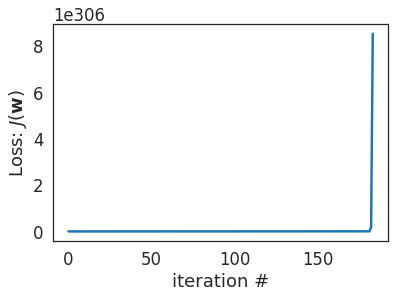

In [ ]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr=0.001, num_epochs=2000)
plot_learning_curves(err_all)

## Learning rate and convergence


Iteration #: 0, loss: 5848.24
Iteration #: 100, loss: 22344831757639987473028518267642586023432448647500082831982138254518930661944765468448014901825017304373168729836614923130933871723790270481593993167594806909250710798336.00
Iteration #: 200, loss:  inf
Iteration #: 300, loss:  inf
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


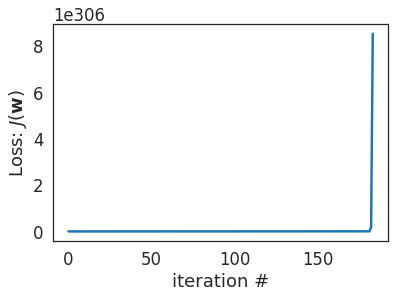

In [ ]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr=0.001, num_epochs=2000)
plot_learning_curves(err_all)